<a href="https://colab.research.google.com/github/RohanCoderiiitb/TinyML-Harvard/blob/main/HorsesOrHumans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2025-06-12 12:13:04--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   214MB/s    in 0.7s    

2025-06-12 12:13:05 (214 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2025-06-12 12:13:05--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse50-5.png', 'horse41-1.png', 'horse11-5.png', 'horse17-5.png', 'horse42-2.png', 'horse15-8.png', 'horse12-5.png', 'horse10-1.png', 'horse28-9.png', 'horse48-7.png']
['human15-09.png', 'human15-04.png', 'human03-08.png', 'human06-11.png', 'human04-16.png', 'human03-21.png', 'human11-05.png', 'human13-12.png', 'human16-13.png', 'human03-07.png']
['horse5-259.png', 'horse6-064.png', 'horse2-294.png', 'horse2-183.png', 'horse5-303.png', 'horse5-342.png', 'horse2-112.png', 'horse2-596.png', 'horse5-103.png', 'horse4-439.png']
['valhuman04-00.png', 'valhuman02-00.png', 'valhuman02-12.png', 'valhuman01-15.png', 'valhuman01-20.png', 'valhuman03-10.png', 'valhuman05-12.png', 'valhuman04-08.png', 'valhuman03-09.png', 'valhuman01-19.png']


In [4]:
import tensorflow as tf

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,617,665 (9.99 MB)

 Trainable params: 2,617,665 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = "binary_crossentropy",
              metrics = ['acc'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size = (100, 100),
    batch_size = 128,
    class_mode = 'binary'
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size = (100, 100),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 100,
    verbose = 1,
    validation_data = val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 0.5608 - loss: 0.6852 - val_acc: 0.5000 - val_loss: 0.6736
Epoch 2/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.5156 - loss: 0.6634

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - acc: 0.5156 - loss: 0.6634 - val_acc: 0.5000 - val_loss: 0.6642
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 672ms/step - acc: 0.6380 - loss: 0.6591 - val_acc: 0.5234 - val_loss: 0.6350
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - acc: 0.6484 - loss: 0.6193 - val_acc: 0.6719 - val_loss: 0.6077
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 815ms/step - acc: 0.7884 - loss: 0.5892 - val_acc: 0.8555 - val_loss: 0.5068
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - acc: 0.6667 - loss: 0.4847 - val_acc: 0.8594 - val_loss: 0.4943
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 944ms/step - acc: 0.7378 - loss: 0.5341 - val_acc: 0.8555 - val_loss: 0.4086
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - acc: 0.9297 - loss: 0.4492 - val_acc: 0.8828 - val_loss: 0.3618
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 745ms/step - acc: 0.7395 - loss: 0.5368 - val_acc: 0.8359 - val_loss: 0.3916
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - acc: 0.9141 - loss: 0.3403

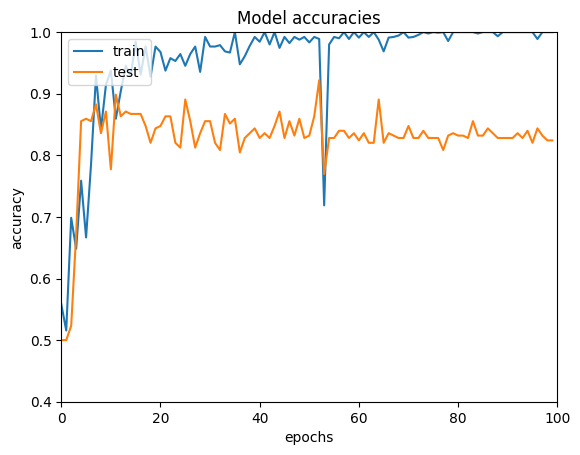

In [10]:
import matplotlib.pyplot as plt
train_accuracies = history.history['acc']
val_accuracies = history.history['val_acc']
plt.title('Model accuracies')
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.xlim([0, 100])
plt.ylim([0.4, 1.0])
plt.show()

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=False)
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 100,
    validation_data = val_generator,
    callbacks = [early_stopper]
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 806ms/step - acc: 1.0000 - loss: 0.0020 - val_acc: 0.8398 - val_loss: 1.9566
Epoch 2/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 1.0000 - loss: 0.0020

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - acc: 1.0000 - loss: 0.0020 - val_acc: 0.8320 - val_loss: 2.0018
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 647ms/step - acc: 1.0000 - loss: 0.0018 - val_acc: 0.8320 - val_loss: 2.0539
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - acc: 1.0000 - loss: 0.0011 - val_acc: 0.8320 - val_loss: 2.0587
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 749ms/step - acc: 1.0000 - loss: 0.0016 - val_acc: 0.8320 - val_loss: 2.1708
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - acc: 1.0000 - loss: 0.0016 - val_acc: 0.8359 - val_loss: 2.1296


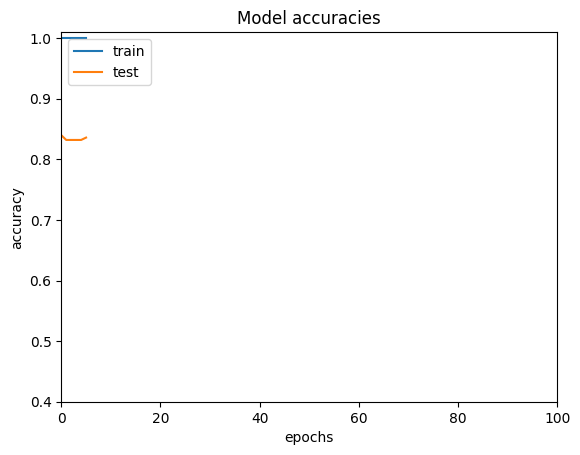

In [16]:
train_accuracies = history.history['acc']
val_accuracies = history.history['val_acc']
plt.title('Model accuracies')
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.xlim([0, 100])
plt.ylim([0.4, 1.01])
plt.show()